In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
input = torch.randn(32, 1, 5, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
input,output

(tensor([[[[ 1.1581e+00, -2.8056e-01, -4.7665e-01,  7.7826e-01,  1.2651e+00],
           [-6.7074e-04,  1.3540e+00,  4.6821e-01, -1.2874e+00, -2.7367e-01],
           [-7.2545e-01, -1.4687e+00,  1.9833e+00,  1.3345e+00, -7.6318e-01],
           [-2.3271e-01, -2.9366e-01,  1.3150e+00,  4.7269e-02, -9.1562e-01],
           [-1.1628e+00, -2.1181e+00, -3.6409e-01,  4.9771e-01,  5.3645e-01]]],
 
 
         [[[ 1.1731e+00,  2.3926e-01, -6.5161e-01,  1.2970e+00, -1.6487e+00],
           [-2.3478e-01,  9.4935e-01,  5.4668e-01,  1.4768e-01,  6.5231e-01],
           [-1.8186e-01, -2.7257e+00,  5.7683e-01,  1.2999e-01, -8.6893e-01],
           [ 1.3196e+00, -1.6863e+00, -1.2412e+00,  2.4238e-01,  2.0064e+00],
           [-2.8043e-01, -6.8380e-01,  3.0619e+00,  1.4536e+00, -4.7658e-01]]],
 
 
         [[[-2.2699e-01,  3.1674e-01,  8.4098e-01, -3.0807e-01, -2.0830e-01],
           [ 3.1594e-01, -1.0821e+00,  3.9901e-01,  1.5684e+00, -2.9850e-01],
           [ 4.1843e-01,  3.2012e-01,  6.6726e-01,  

In [4]:
#初始化
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [5]:
#定义损失函数
loss = nn.CrossEntropyLoss(reduction='none')

In [6]:
#定义优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

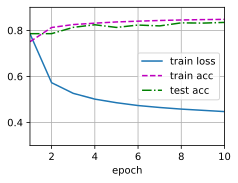

In [7]:
#训练
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)